# ДЗ №2 по курсу "Прикладная теория графов"
## Ерманов Данат 154

### 1. Загрузка данных

In [217]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, read_csv
import math
import random
from itertools import combinations


inf = 1000000
br_size = 15
cm_size = 10

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist 2.csv', index_col='eventid')
df

/home/danat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,70,76,79,90,92,94,96,101,107,112,114,115,117,118,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
197001020003,1970,1,2,NaN,0,NaN,217,United States,1,North America,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


---

### 2-3. Создание графов

In [182]:
def makeGraph(year, bridge_number = 0, comp = 1000):
    # выделение событий нужного года с непустым количеством "соседей"
    ids = list (df[ (df['iyear'] == year) & (~ pd.isna(df['related'])) ].index)
    g = nx.Graph()
    g.add_nodes_from(ids)
    # добавление ребер в граф на networkx
    for i in range(len(ids)):
        for j in df.loc[ids[i]]['related'].split(','):
            if (int (j) in ids and int (j) != ids[i]):
                g.add_edge(ids[i], int (j))
                
    # компоненты связанности, кроме топ 10(comp) компонент
    q = sorted(list(nx.connected_components(g)), key = lambda x: len(x), reverse = True)[comp:]
    # удление из графа вершин, не вхоядящих в топ 10 компонент
    g.remove_nodes_from(set().union(*q))
    # все возможные ребра между топ10 компонентами связанности
    bridges = list ((nx.complement(g)).edges)
    random.shuffle(bridges)
    bridges = bridges[:bridge_number]
    # добавление к топ10 компонентам связанности рандоомных 15(bridge_number) межкомпонентных ребер
    g.add_edges_from(bridges)
    
    # создание матрицы и списка смежности для дальнейшего удобства
    ids = list(g.nodes)
    n = len(ids)
    a = np.zeros((n, n))
    t = [[]] * n
    for i, j in g.edges:
        a[ids.index(i)][ids.index(j)] = 1
        a[ids.index(j)][ids.index(i)] = 1
        t[ids.index(i)].append(ids.index(j))
        t[ids.index(j)].append(ids.index(i))
                
                
    return ids, a, t, g, bridges

Графы 2005 и 2006 годов состоят из множества мелких компонент связанности(4-10 вершин). Возьмем топ 10 компонент и свяжем их 15 ребрами.

In [183]:
id1, m1, l1, g1, bridge1 = makeGraph(2005, comp=cm_size, bridge_number=br_size) #15 and 10
id2, m2, l2, g2, bridge2 = makeGraph(2006, comp=cm_size, bridge_number=br_size)
print(len(id1), len(id2))
print("number of components in 2005:", len(list(nx.connected_components(g1))))
print("number of components in 2006:", len(list(nx.connected_components(g2))))

48 53
number of components in 2005: 1
number of components in 2006: 1


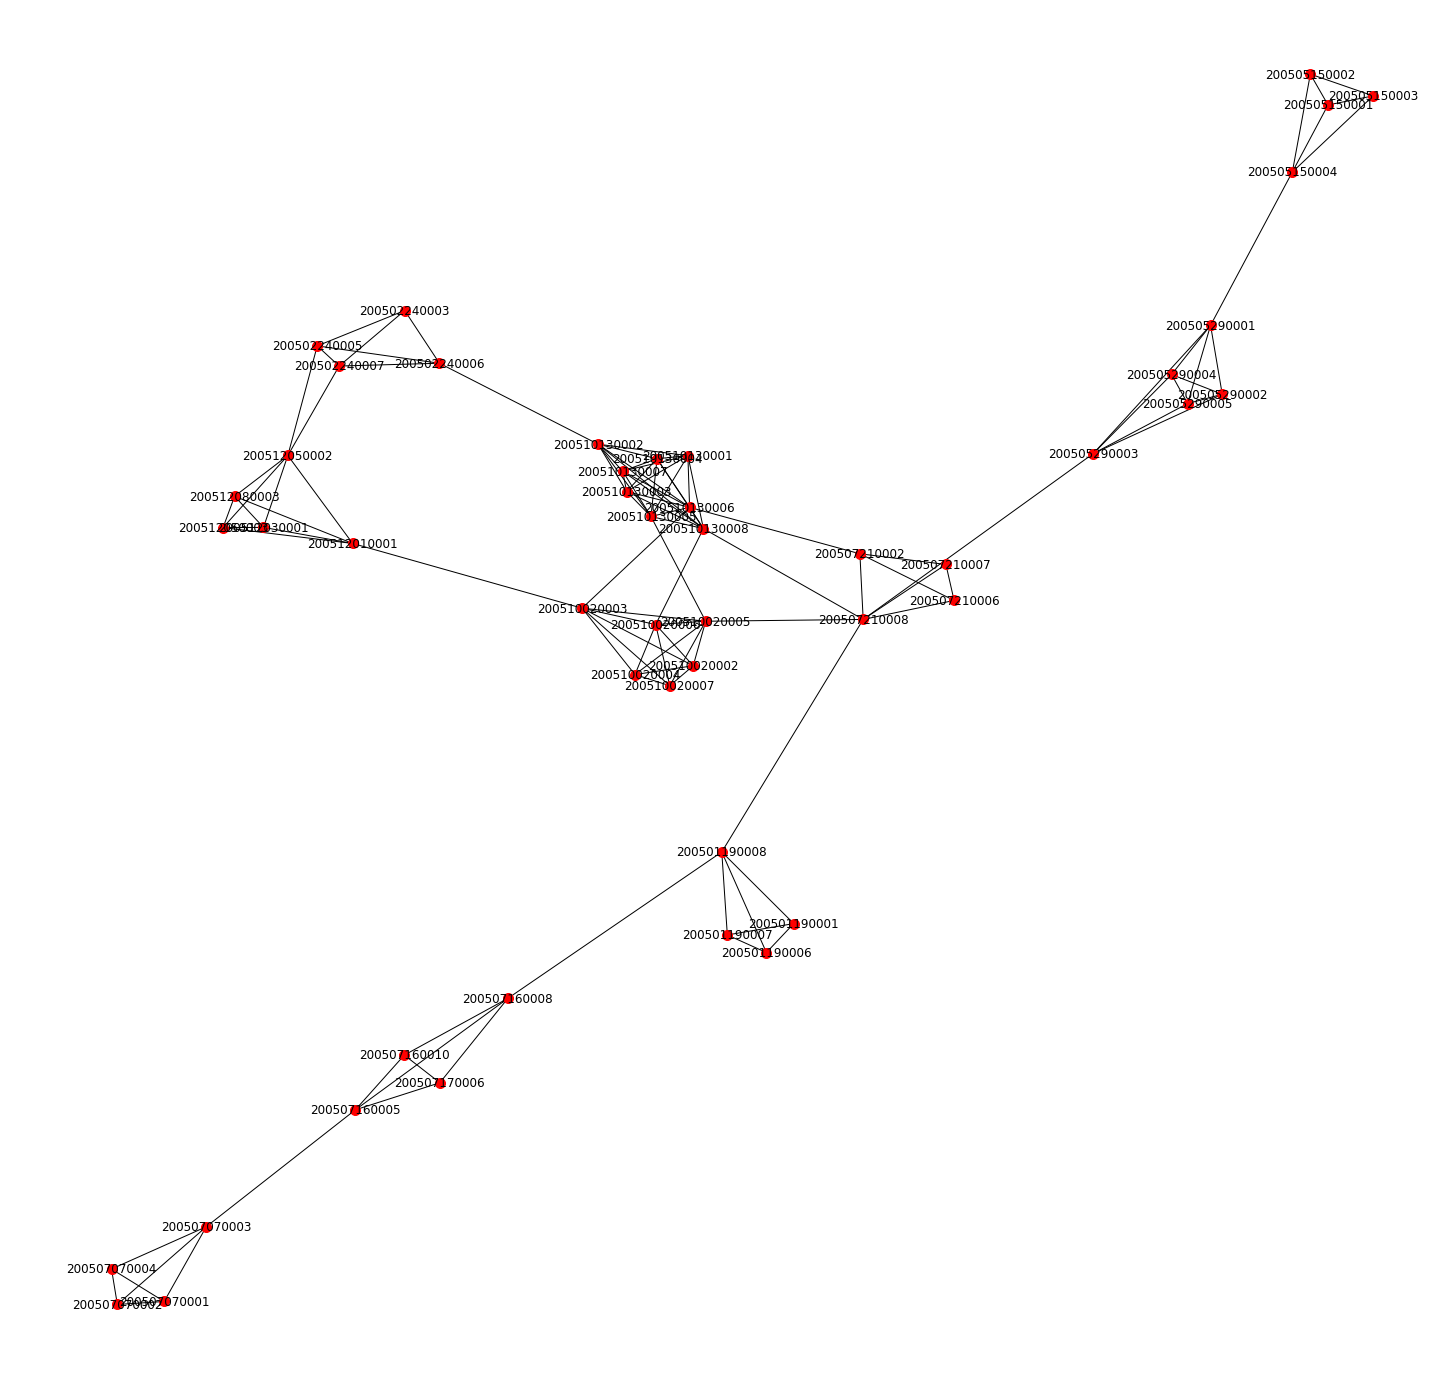

In [185]:
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g1, node_size=100)
plt.show()

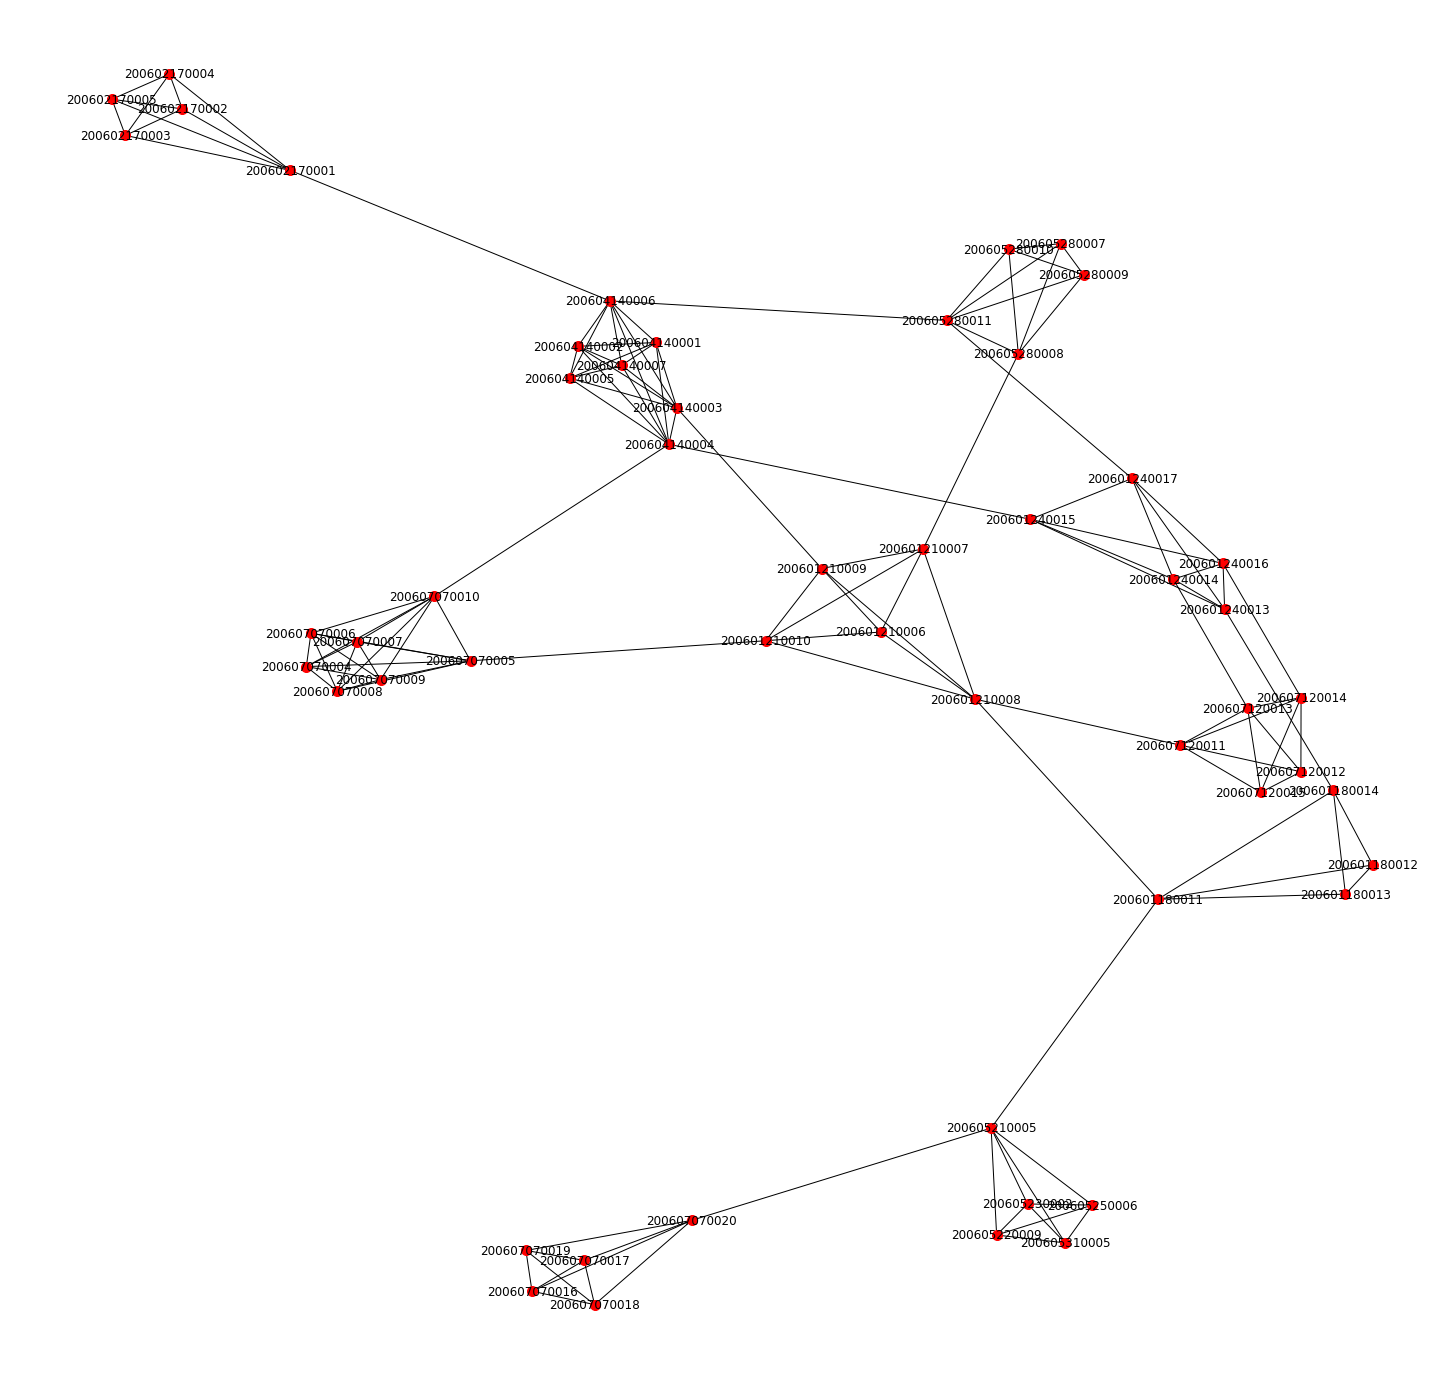

In [186]:
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g2, node_size=100)
plt.show()

Заметим, что все компоненты связанности наших графов состоят из клик размера 4-10. В дальнейшем это упростит реализацию некоторых алгоритмов.

---

### 4. Graph edit distance

***

### 5. Diameter, eccentricity, periphery, girth, expansion

In [187]:
def floyd(a):
    m = np.copy(a)
    n = len(m)
    for i in range(n):
        for j in range(n):
            if (m[i][j] == 0):
                m[i][j] = inf
    for k in range(n):
        for i in range(n):
            for j in range(n):
                m[i][j] = min(m[i][j], m[i][k] + m[k][j])
        
    return m

In [188]:
distance1 = floyd(m1)
distance2 = floyd(m2)

In [189]:
diametr1 = np.amax(distance1)
diametr2 = np.amax(distance2)
print('diametr in 2005:', diametr1)
print('diametr in 2006:', diametr2)

diametr in 2005: 9.0
diametr in 2006: 9.0


На наших данных диаметр графа строго зависит от выбора межкликовых рёбер и при каждой генерации графа, выдает значения с большим разбросом. Чтобы результаты были хоть как-то относительны, посмотрим отношение к количеству вершин.

In [310]:
x, y, =(diametr1/g1.number_of_nodes()), (diametr2/g2.number_of_nodes())
if x > y:
    x, y = y, x
print(x/y*100,'%')

90.56603773584905 %


---

In [309]:
eccentricity1 = np.amax(distance1, axis = 0)
eccentricity2 = np.amax(distance2, axis = 0)
print(eccentricity1)
print(eccentricity2)
x, y = np.mean(eccentricity1), np.mean(eccentricity2)
if x > y:
    x, y = y, x
print(x/y*100,'%')

[6. 6. 6. 5. 9. 9. 8. 9. 9. 9. 9. 8. 7. 7. 6. 7. 7. 9. 9. 8. 9. 7. 6. 7.
 7. 6. 6. 6. 5. 7. 7. 7. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 6. 8. 9. 9. 9. 9.]
[6. 7. 7. 6. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 8. 9. 9. 9. 9. 7. 7. 6. 7. 7.
 7. 7. 7. 8. 8. 8. 7. 6. 7. 7. 7. 8. 7. 6. 7. 7. 7. 7. 7. 9. 9. 9. 9. 8.
 6. 7. 6. 6. 7.]
94.93996569468267 %


---

In [312]:
periphery1 = [id1[i] for i in range(len(id1)) if eccentricity1[i] == diametr1]
periphery2 = [id2[i] for i in range(len(id2)) if eccentricity2[i] == diametr2]
print('periphery in 2005:', periphery1)
print('periphery in 2006:', periphery2)
x, y = len(periphery1), len(periphery2)
if x > y:
    x, y = y, x
print(x/y*100,'%')

periphery in 2005: [200502240003, 200502240005, 200502240007, 200505150001, 200505150002, 200505150003, 200507070001, 200507070002, 200507070004, 200512030001, 200512050002, 200512050003, 200512080003]
periphery in 2006: [200602170002, 200602170003, 200602170004, 200602170005, 200607070016, 200607070017, 200607070018, 200607070019]
61.53846153846154 %


---

In [192]:
girth1 = len(sorted(nx.cycle_basis(g1), key = lambda x: len(x))[0]) 
girth2 = len(sorted(nx.cycle_basis(g2), key = lambda x: len(x))[0])
print('girths:', girth1, girth2)

girths: 3 3


Абсолютно во всех годах girth равен 3.

---

In [265]:
# списко клик графов
cl1 = sorted(list(nx.find_cliques(g1)), key = lambda x: len(x), reverse=True)[:cm_size]
cl2 = sorted(list(nx.find_cliques(g2)), key = lambda x: len(x), reverse=True)[:cm_size]

Для вычисление оптимального Edge expansion нужно выбирать клики или множество клик из-за минимального отнешения пограничных ребер к числу вершин в подграфе. Т.к. при выборе просто некоего подграфа в клике, сразу появляется множество пограничных ребер.

In [194]:
def edgeExpansion(cl, g):
    minset = set()
    exp = inf
    # перебор всех подмножеств клик
    for i in range(1, 2**len(cl)):
        # объединение подмножества клик в одно множество вершин
        clset = set().union(*[cl[j] for j in range(10) if (i>>j & 1)])
        counter = 0
        # подсчёт граничных рёбер
        for x, y in g.edges():
            c = 0
            if (x in clset): 
                c += 1
            if (y in clset):
                c += 1
            if (c == 1):
                counter += 1
        # сравнение edge expansion с оптимальным подмножеством
        if (len(clset) <= g.number_of_nodes() // 2 and exp > counter/len(clset)): 
            exp = counter/len(clset)
            minset = clset
        
    return exp, minset

Данный алгоритм не учитывает такого случая, когда в вершину клики приходит множество межкликовых ребер и выгоднее просто брать клику без этой одной вершины. Но на наших графах с разреженными межкликовыми ребрами это очень маловероятный случай и можно им пренебреч.

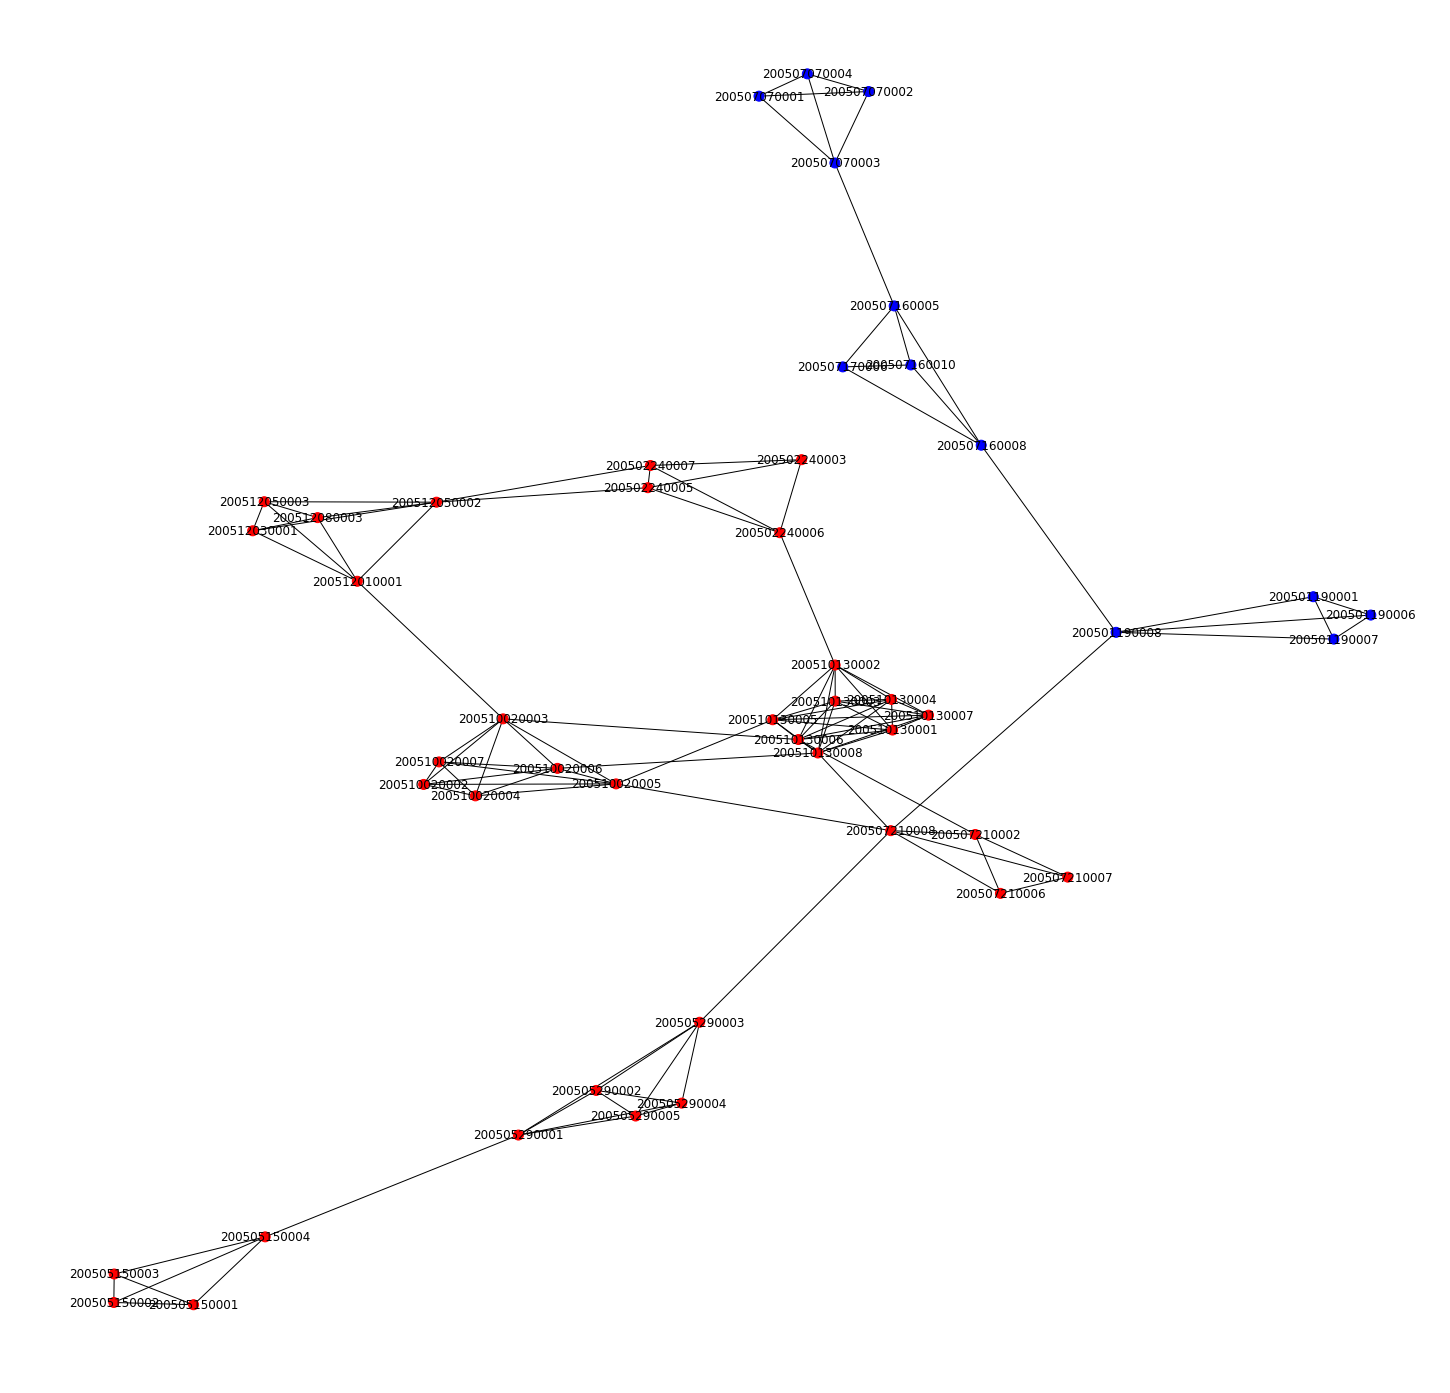

In [203]:
exp1, expset1 = edgeExpansion(cl1, g1)
e = []
for i in g1.nodes():
    if i in expset1:
        e.append('blue')
    else:
        e.append('red')
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g1, node_color=e, node_size=100)
plt.show()

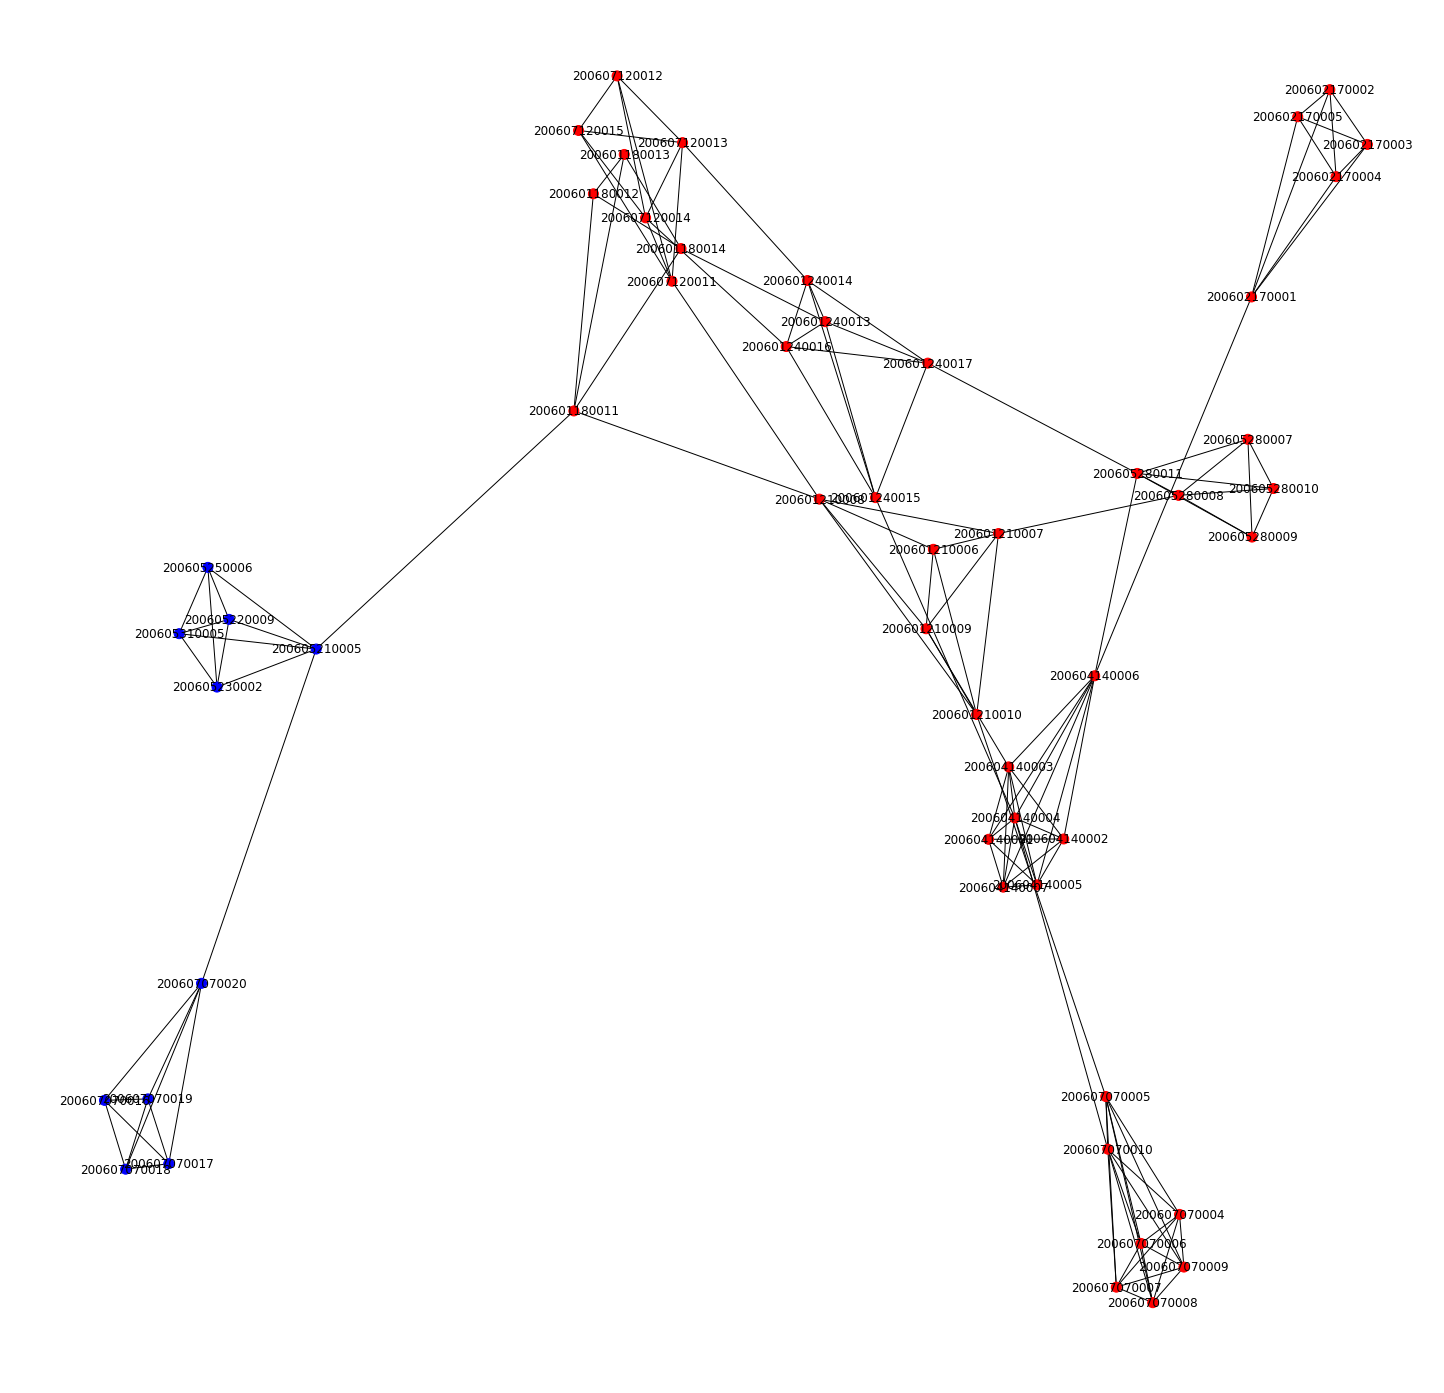

In [208]:
exp2, expset2 = edgeExpansion(cl2, g2)
e = []
for i in g2.nodes():
    if i in expset2:
        e.append('blue')
    else:
        e.append('red')
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g2, node_color=e, node_size=100)
plt.show()

In [313]:
x, y = exp1, exp2
if x > y:
    x, y = y, x
print(x/y*100,'%')

83.33333333333333 %


---

### 6. Wiener index

In [315]:
wi1 = np.sum(distance1)
wi2 = np.sum(distance2)
print('Wiener index:', wi1, wi2)
x, y = wi1, wi2
if x > y:
    x, y = y, x
print(x/y*100,'%')

Wiener index: 9574.0 11086.0
86.36117625834385 %


### 7. Hosoya index

Т.к. наши графы состоят из клик и 15 рёбер между ними и известны индексы Хосойи для полных графов, то несложно подсчитать количество паросочетаний и во всем графе. Будем перебирать все подмножества межкликовых рёбер и для тех, которые попарно несмежны, подсчитаем количество паросочетаний на кликах. Если какая-то вершина из клики участвует в межкликовом паросочетании, то она просто выбывает из клики и можно вычислить по таблице индекс Хосойи для оставшегося полного графа.

In [283]:
from networkx.algorithms import approximation
full_hosoya = [1, 1, 2, 4, 10, 26, 76, 232, 764, 2620, 9496, 35696, 140152, 568504]

def matchingCount(bridge, cl, g, test = False):
    counter = 0
    # создаем словарь событий и клик к которому они принадлежат
    clDi = dict()
    for i in range(len(cl)):
        clDi.update({x:i for x in cl[i]})
    
    # перебираем все возможные подмножества межкликовых ребер 
    for i in range(2**len(bridge)):
        clD = clDi.copy()
        matchV = set()
        matching = True
        for j in range(len(bridge)):
            # проверка ребра на наличие в данном подмножестве
            if (i>>j & 1):
                x, y = bridge[j]
                # проверка ребра на пересечение с уже имеющимся межкликовым паросочетнием
                if (x in matchV or y in matchV): 
                    matching = False
                else:
                    # добавление ребра в паросочетание
                    matchV.add(x)
                    matchV.add(y)
                    # используемые в межкликовом паросочетании вершины не участвуют в паросочетании на кликах
                    clD.pop(x)
                    clD.pop(y)
                    
        var = 1
        # подсчёт количества паросочетаний на оставшихся кликах с использованием табличных значений
        for i in range(len(cl)):
            var *= full_hosoya[list(clD.values()).count(i)]
        if (test):
            var = 1
        # проверка данного сочетания ребер на попарную несмежность
        if (matching):
            counter += var
            
    return counter

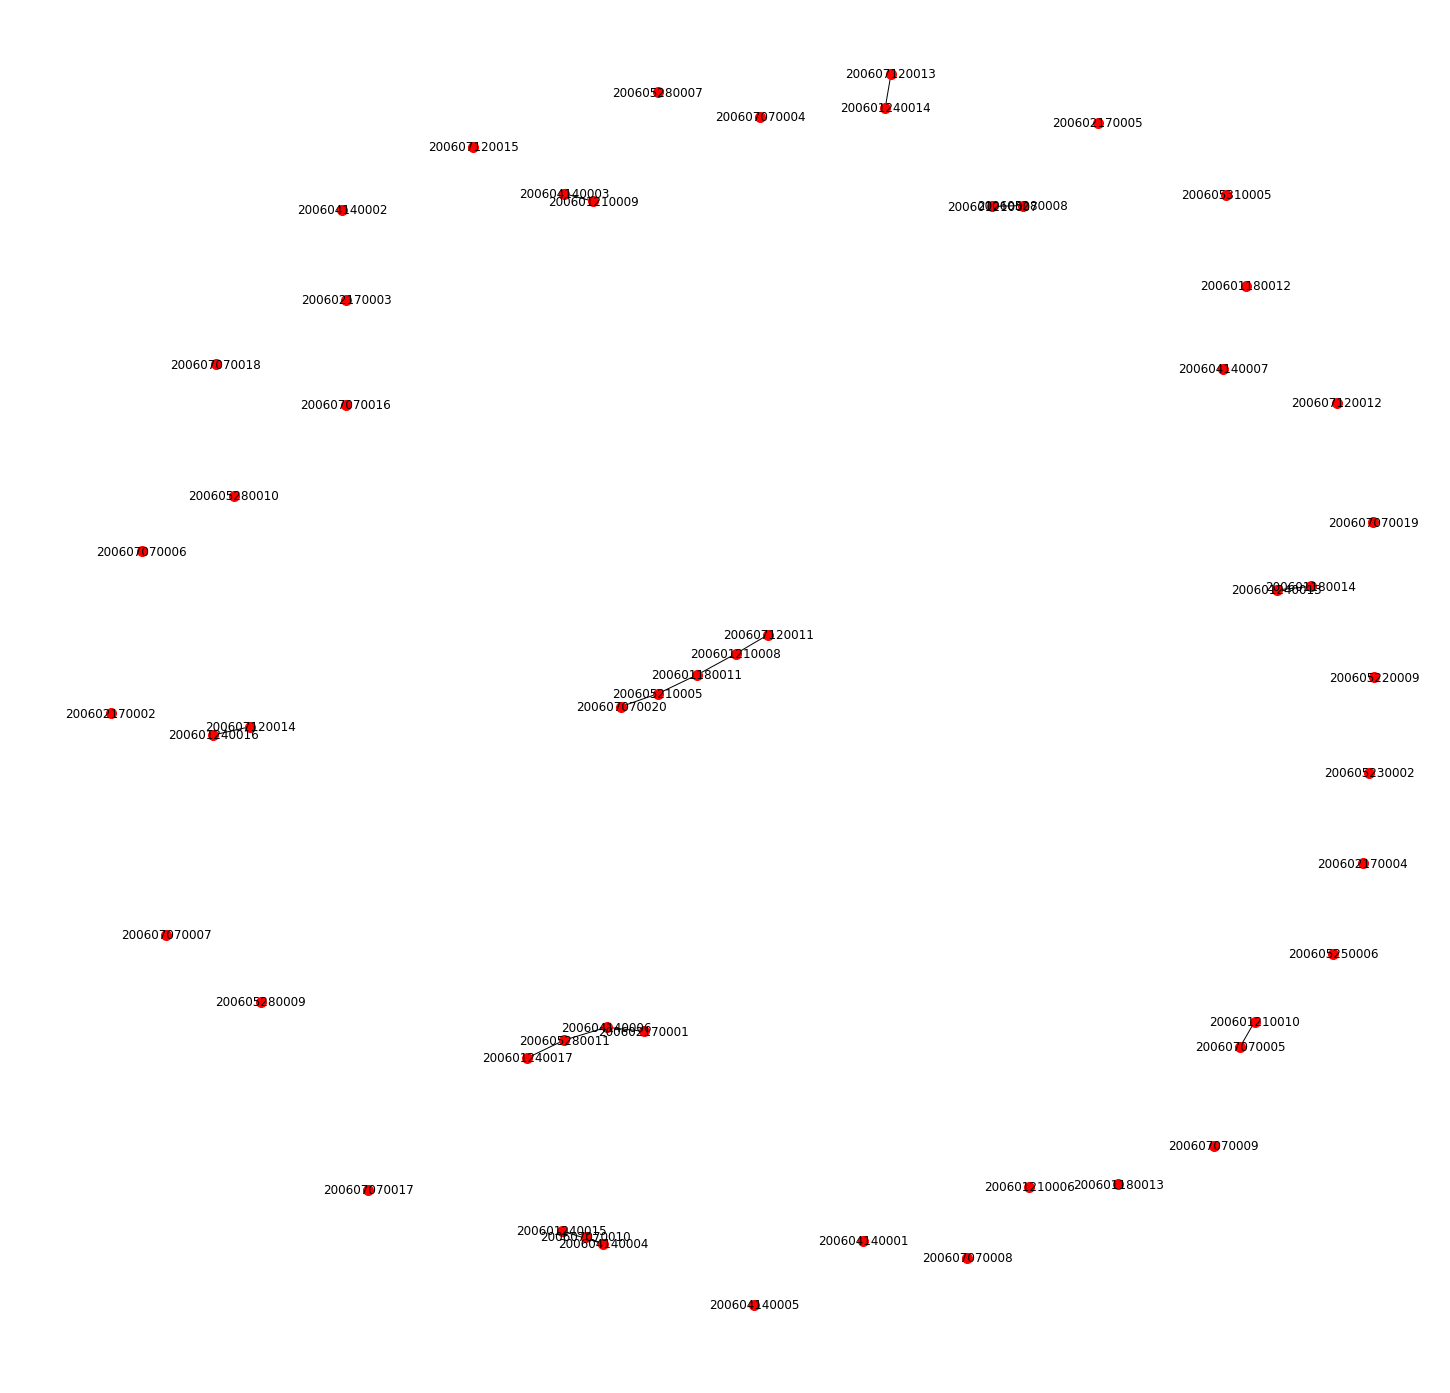

In [275]:
g = g2.copy() 
g.remove_edges_from(g2.edges)
g.add_edges_from(bridge2)
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g, node_size=100)
plt.show()

Тут изображены межкликовые ребра(15 штук). Проверим алгоритм на подсчет количества паросочетаний, без учёта паросочетаний в кликах.

In [284]:
matchingCount(bridge2, cl2, g2, test=True)

7680

6 не связанных ребер, одна цепочка из 2 ребер, одна из 3 и еще одна из 4. (2^6) \* 3 \* 5 \* 8 = 7680

In [286]:
hos1 = matchingCount(bridge1, cl1, g1)
hos2 = matchingCount(bridge2, cl2, g2)
print('Hosoya index:', hos1, hos2)

Hosoya index: 236756671906816 28880684305870848


### 8. Ядро

Для клики ядром будет являться любая её веришна.

In [298]:
def core(cl, bridge):
    l = []
    used = set()
    for cm in cl:
        v = -1
        for j in range(len(cm)):
            if (not cm[j] in used):
                v = j
        if (v != -1):
            for x, y in bridge:
                if (x == cm[v] or y == cm[v]):
                    used.add(x)
                    used.add(y)
            used.add(cm[v])
            l.append(cm[v])
    
    return l                 

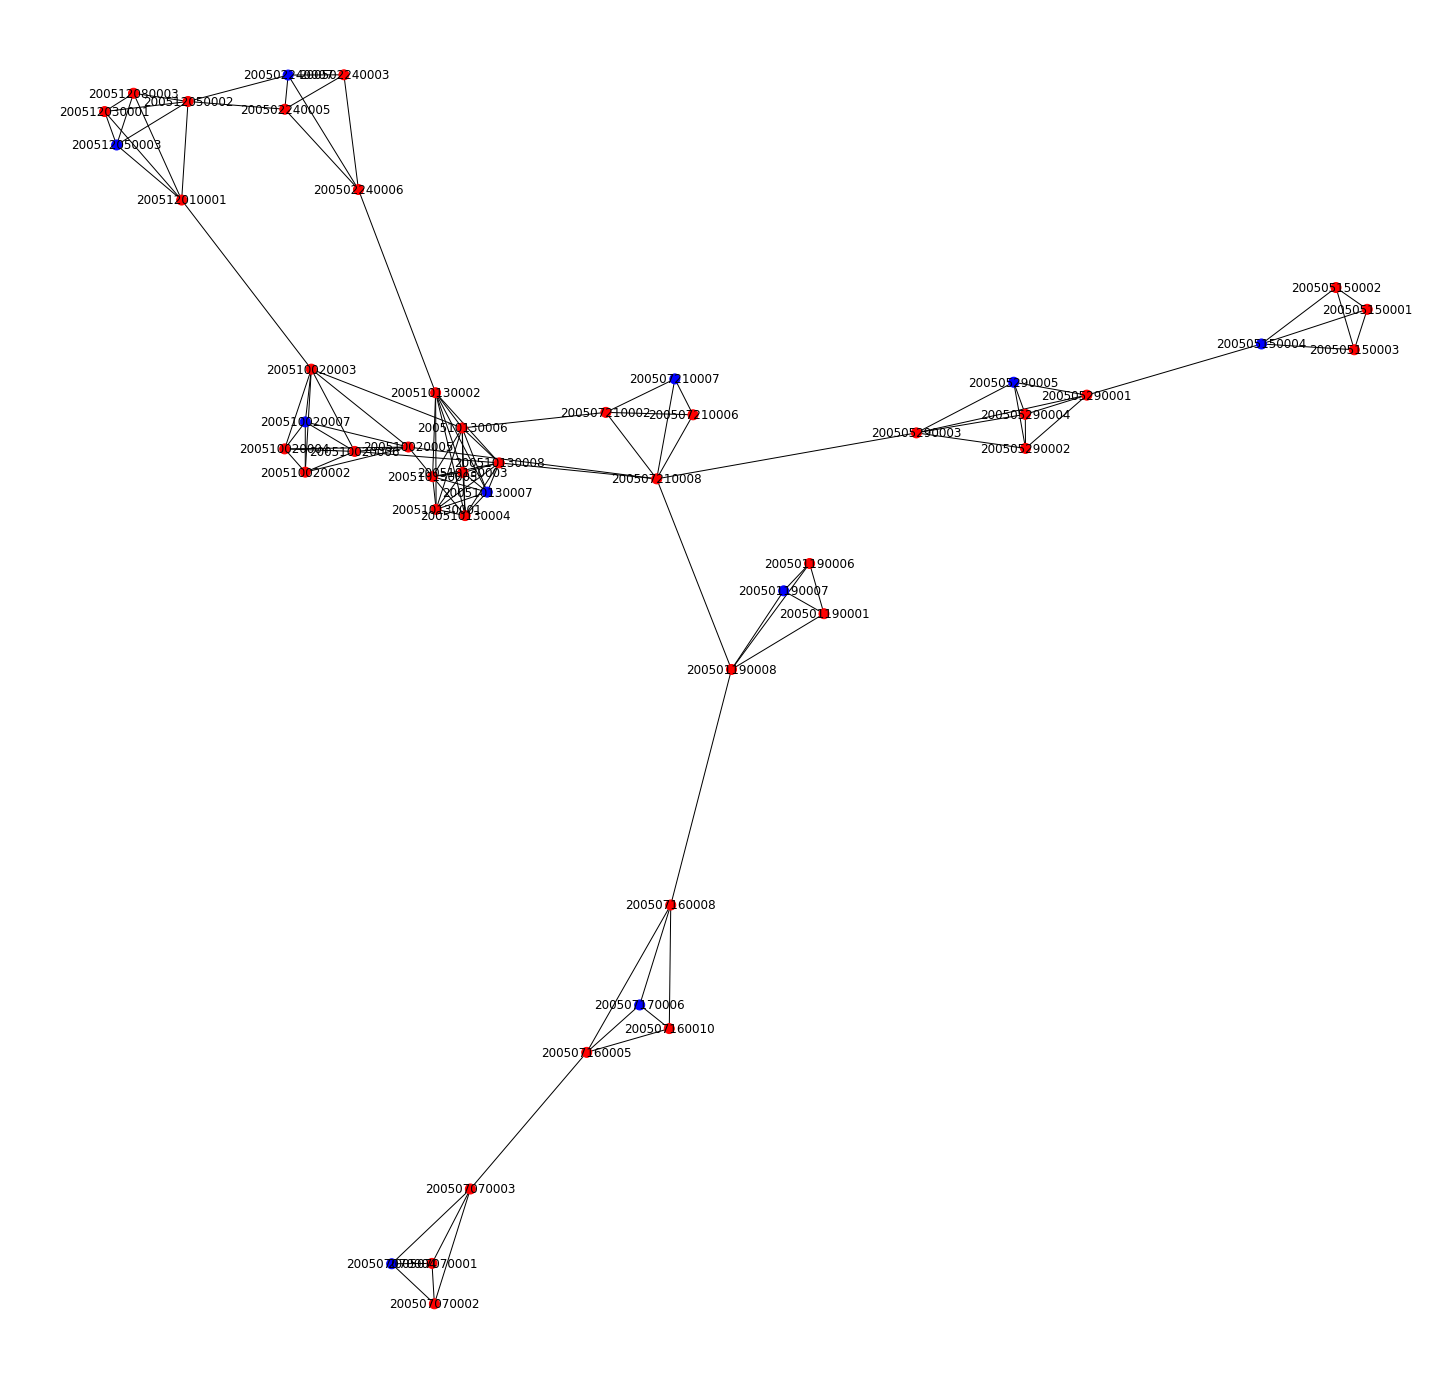

In [301]:
core1 = core(cl1, bridge1)
e = []
for i in g1.nodes():
    if i in core1:
        e.append('blue')
    else:
        e.append('red')
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g1, node_color=e, node_size=100)
plt.show()

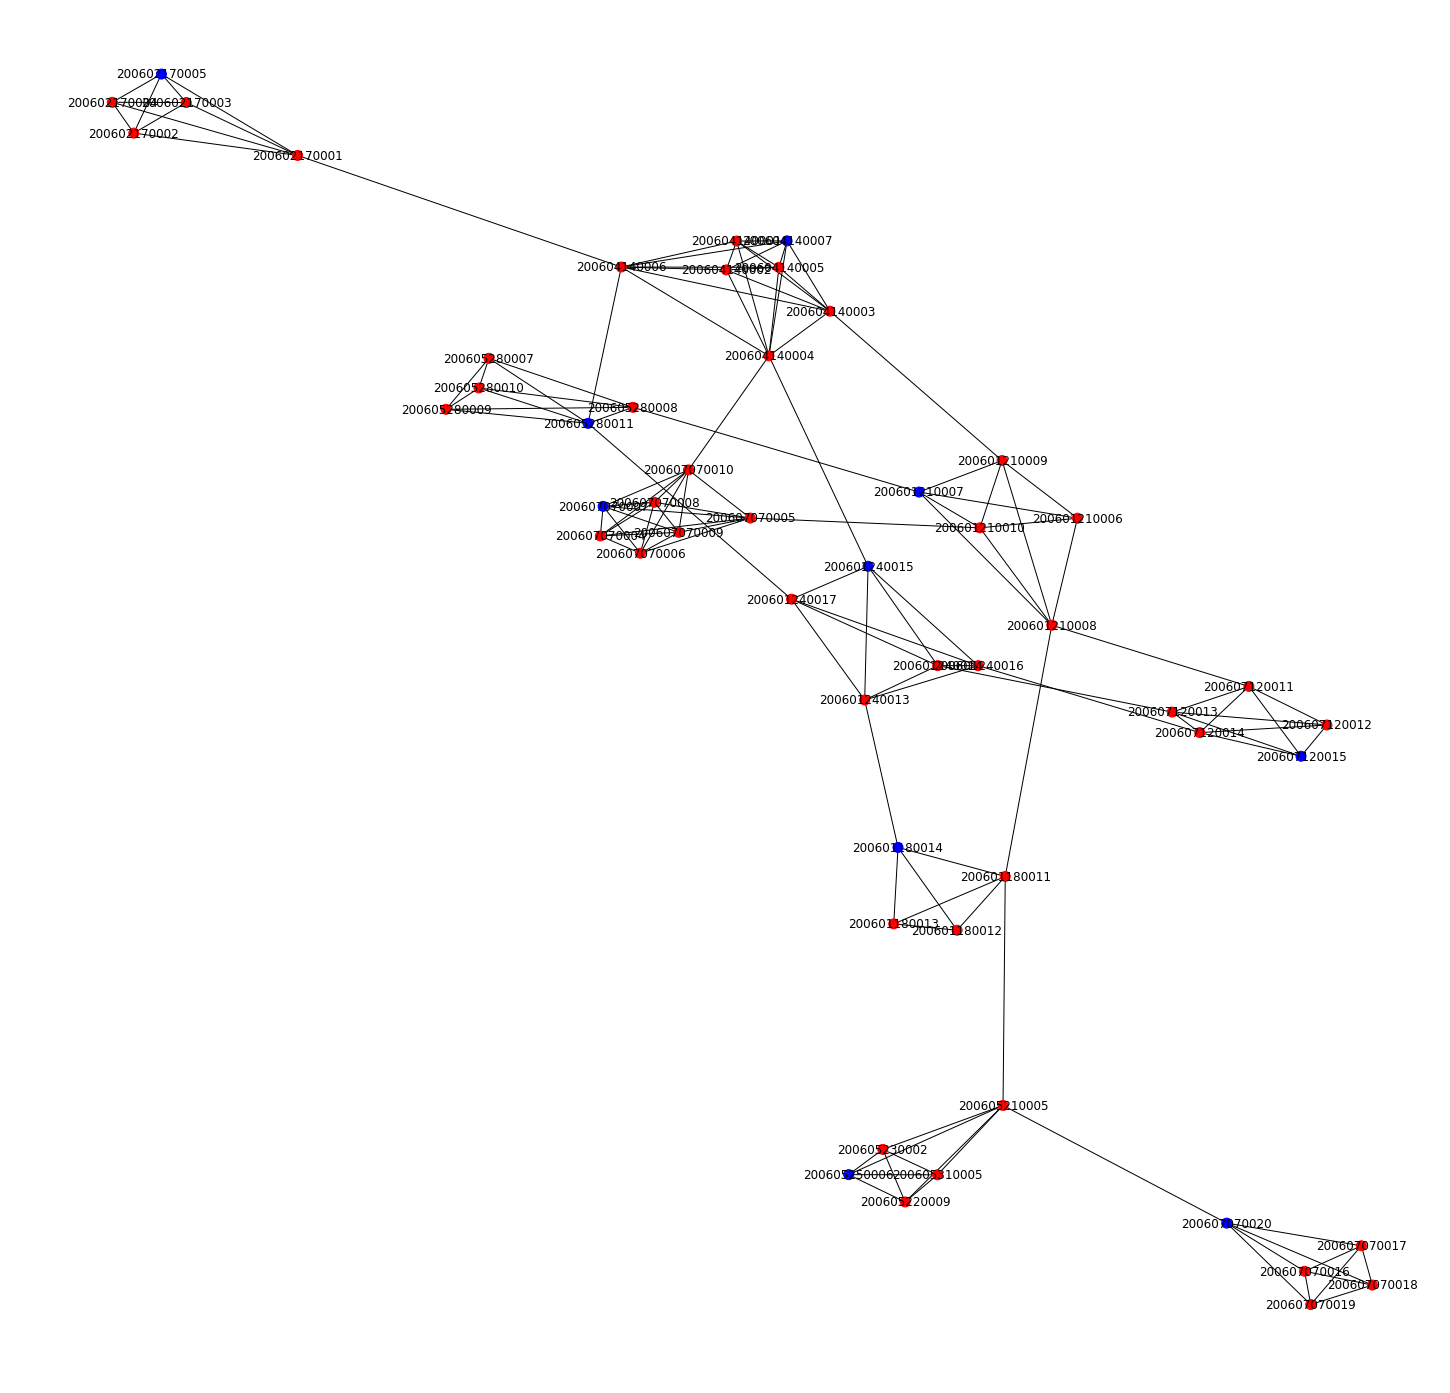

In [302]:
core2 = core(cl2, bridge2)
e = []
for i in g2.nodes():
    if i in core2:
        e.append('blue')
    else:
        e.append('red')
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx(g2, node_color=e, node_size=100)
plt.show()

Т.к. почти все графы из этой базы данных состоят из клик, то данная метрика отображает только количество выбранных компонент связанности. В нашем случае:

In [303]:
print('cores:', len(core1), len(core2))

cores: 10 10
